In [1]:
import os
import sys
sys.path.append('stylegan2/')
import torch
import numpy as np
from sklearn import svm
import dnnlib
import legacy
from PIL import Image


# Load the pre-trained model
network_pkl = './stylegan2/models/cars-network.pkl'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

if torch.cuda.is_available():
    print("CUDA is available. Using GPU.")
else:
    print("CUDA is not available. Using CPU.")

# Load the model
with open(network_pkl, 'rb') as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device)  # Assuming 'G_ema' is the generator

CUDA is available. Using GPU.


/home/juan/git/ControlledGeneration/.venv/lib/python3.12/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(io.BytesIO(b))


Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... 

/home/juan/git/ControlledGeneration/stylegan2/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/home/juan/git/ControlledGeneration/stylegan2/torch_utils/ops/upfirdn2d.py", line 32, in _init
    _plugin = custom_ops.get_plugin('upfirdn2d_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/juan/git/ControlledGeneration/stylegan2/torch_utils/custom_ops.py", line 110, in get_plugin
    torch.utils.cpp_extension.load(name=module_name, verbose=verbose_build, sources=sources, **build_kwargs)
  File "/home/juan/git/ControlledGeneration/.venv/lib/python3.12/site-packages/torch/utils/cpp_extension.py", line 1312, in load
    return _jit_compile(
           ^^^^^^^^^^^^^
  File "/home/juan/git/ControlledGeneration/.venv/l

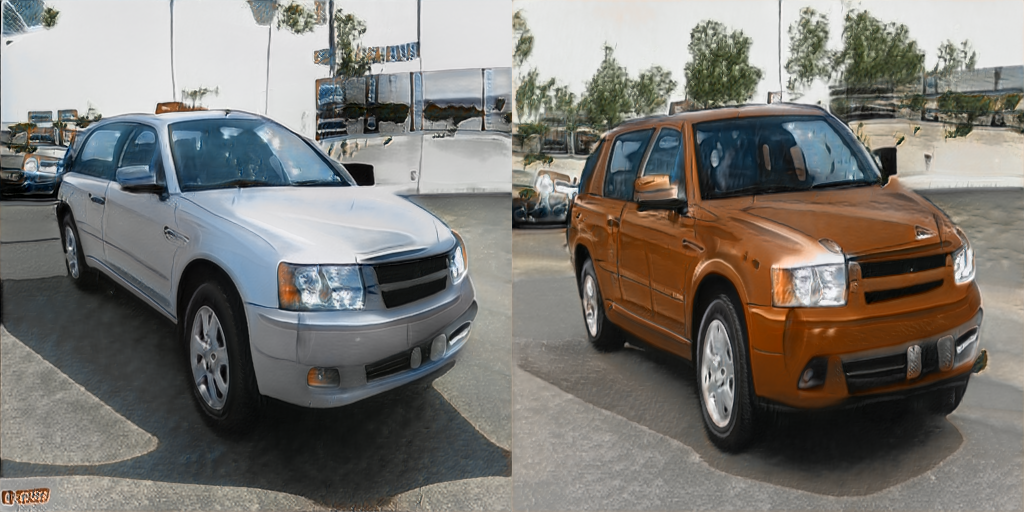

In [43]:
from PIL import Image
import torch
import numpy as np
ORIGINAL_IMAGE_SEED = 1
DIRECTION_VECTOR = './cars/direction_vectors/vector_10.npy'
STRENGHT = 20

# Assuming you already have these functions and imports
def generate_image_from_w(G, z):
    img = G(z, None, truncation_psi=0.5, noise_mode='const')
    img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
    return Image.fromarray(img[0].cpu().numpy(), 'RGB')

# Set the seed and generate the before image
torch.manual_seed(ORIGINAL_IMAGE_SEED)
z = torch.randn(1, 512).to(device)
before_image = generate_image_from_w(G, z)

# Load and apply the direction vector
dir_vector = np.load(DIRECTION_VECTOR)
dir_vector = torch.tensor(dir_vector).to(device)
new_z = z.clone()
new_z += dir_vector * STRENGHT

# Generate the after image
after_image = generate_image_from_w(G, new_z)

# Create a new image by concatenating the before and after images side by side
def concatenate_images(img1, img2):
    dst = Image.new('RGB', (img1.width + img2.width, img1.height))
    dst.paste(img1, (0, 0))
    dst.paste(img2, (img1.width, 0))
    return dst

# Concatenate the images
concatenate_images(before_image, after_image)




